In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics
from sklearn.datasets import make_blobs

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20)
%matplotlib notebook

# Machine Learning (ML)

# Métricas de regresión

In [62]:
# Métricas con los datos de testeo
print(f"MAE  = {metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_tt)}")
print(f"MSE  = {metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_tt)}")
print(f"RMSE = {np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_tt))}")
print(f"MAPE = {metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred_tt)*100} %")
print(f"R²   = {metrics.r2_score(y_true=y_test, y_pred=y_pred_tt)}")

MAE  = 2886.269892106823
MSE  = 18843594.8121861
RMSE = 4340.9209635958705
MAPE = 19.45265013524762 %
R²   = 0.7712752434248481


In [63]:
# Métricas con los datos de entrenamiento
print(f"MAE  = {metrics.mean_absolute_error(y_true=y_train, y_pred=y_pred_tr)}")
print(f"MSE  = {metrics.mean_squared_error(y_true=y_train, y_pred=y_pred_tr)}")
print(f"RMSE = {np.sqrt(metrics.mean_squared_error(y_true=y_train, y_pred=y_pred_tr))}")
print(f"MAPE = {metrics.mean_absolute_percentage_error(y_true=y_train, y_pred=y_pred_tr)*100} %")
print(f"R²   = {metrics.r2_score(y_true=y_train, y_pred=y_pred_tr)}")

MAE  = 2340.051242838702
MSE  = 10275445.518072499
RMSE = 3205.5335777484065
MAPE = 18.33491916471301 %
R²   = 0.8177688181233371


<IPython.core.display.Javascript object>


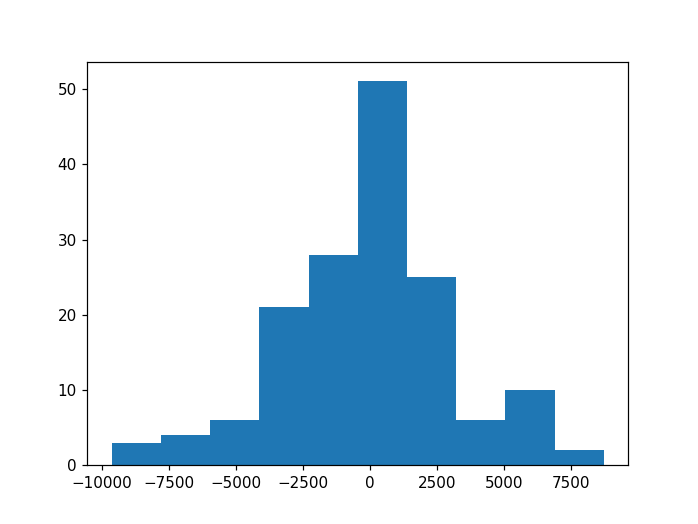

In [64]:
# Visualización de los residuos
fig, ax = plt.subplots()
ax.hist((y_pred_tr-y_train).reshape(1,-1)[0])
plt.show()

# Regresión logística

Algunos algoritmos de regresión pueden ser usados para el problema de clasificación. La **Regresión Logística** se usa, comunmente, para determinar la probabilidad de que una instancia pertenezca a una clase particular. 

Supongamos que tenemos dos clases: clase A (clase positiva, etiquetada como 1) y clase B (clase negativa, etiquetada como 0). Si estimamos una probabilidad $\hat{p}$ en regresión logística, tenemos entonces que el problema de clasificación binario se trata de la siguiente forma:

\begin{equation*}
\hat{y} = \begin{cases}
1 &\hat{p}\geq0.5\\
0 &\hat{p}<0.5
\end{cases}
\end{equation*}

Sin entrar en detalles, la probabilidad estimada de $y$ dado x, es tal que 

\begin{equation}
\hat{p}=h_w(\mathbf{x})=\sigma(\mathbf{x}^T\mathbf{w})
\end{equation}

En donde, $\sigma(.)$ representa la función logística, o sigmoide, mediante la cual se obtiene un resultado que esta entre 0 y 1. En la regresión logística **la probabilidad se ajusta a una función sigmoide/logística para realizar el mapeo a probabilidades**. Esta función está definida por la ecuación:

\begin{equation}
\sigma(t)=\frac{e^{t}}{1+e^{-t}}
\end{equation}

La función sigmoide se ve como:

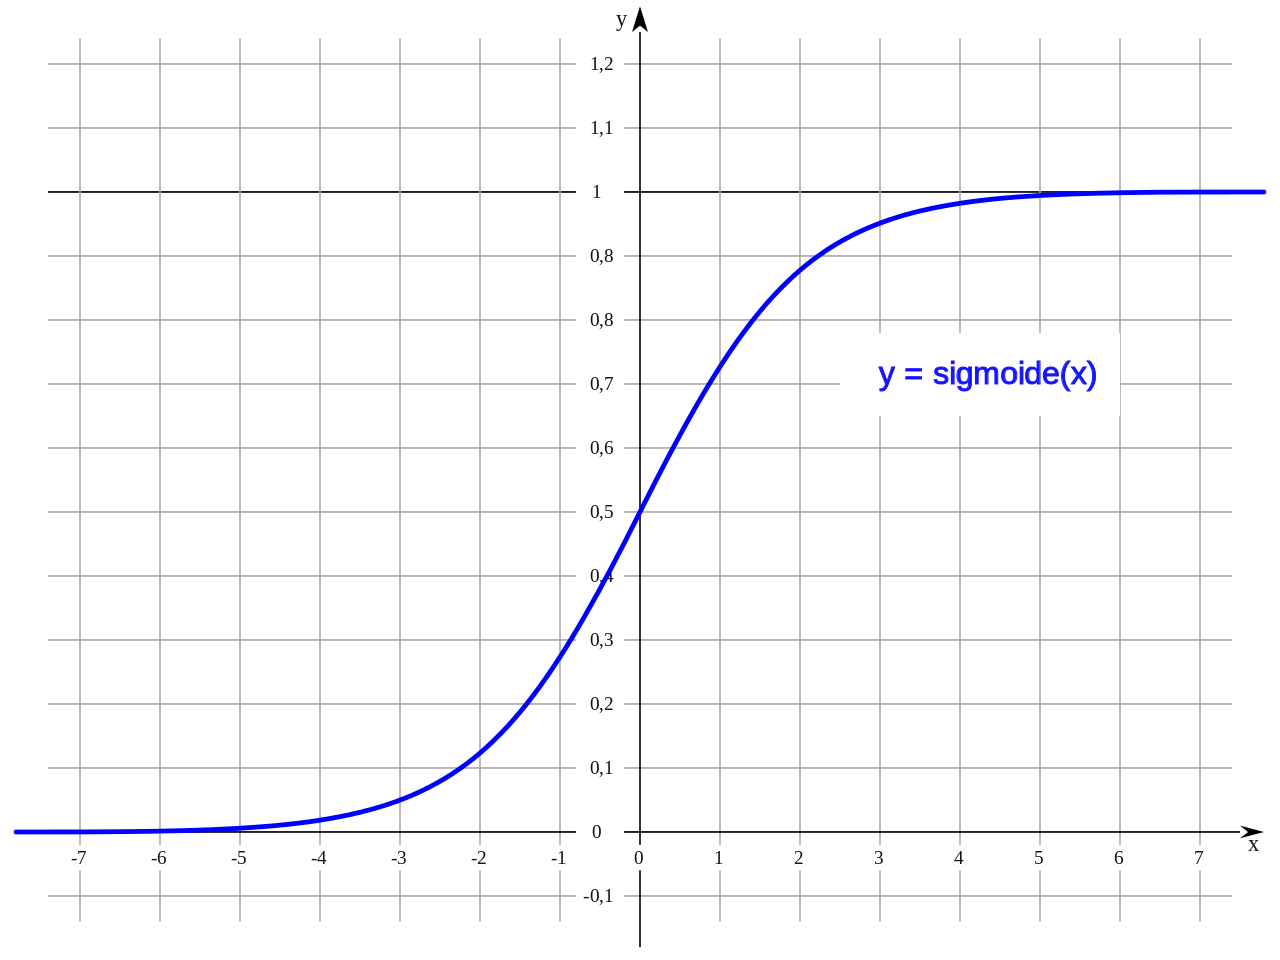

Observaciones:

* La función sigmoide tiende rápidamenta a cero para valores negativos.
* La función sigmoide tiende rápidamente a 1 para valores positivos.
* $\sigma(t)<0.5$ si $t<0$.
* $\sigma(t)\geq0.5$ si $t\geq0$.

De los dos últimos ítems se tiene que nuestro modelo de regresión logística predice un valor de 1 si $\mathbf{x}^T\mathbf{w}$ es positivo y cero si es negativo.

### La regresión logística y la regresión lineal

Recordemos que en la **regresión lineal** se determina una función que relaciona a una variable dependiente continua, con algunos predictores (variables independientes $x_1$, $x_2$, etc.). Por ejemplo, en la regresión lineal multiple se asume una función de la forma:


\begin{equation}
y = w_0 + w_1x_1 + w_2x_2 + \cdots
\end{equation}

en la que se determinan los valos de los parámetos $w$ que minimizan el error. Lo anterior puede generalizarse como:


\begin{equation}
ℎ_w(𝑥) = \sigma({\mathbf{x}^T\mathbf{w}}) 
\end{equation}

La regresión logística es una variación de la regresión lineal, la cual resulta útil en los casos en que la variable dependiente, es categórica. Como se mencionó, la regresión logística produce como resultado la probabilidad de que una instancia pertenezca a un clase dada.

La regresión logística ajusta entonces una curva en forma de "S", tomando la regresión lineal ($\mathbf{x}^T\mathbf{w}$) y transformando la estimación numérica en una probabilidad (entre 0 y 1), mediante la función sigmoide:

$$
ℎ_w(𝑥) = \sigma({\mathbf{x}^T\mathbf{w}}) =  \frac {e^{(w_0 + w_1  x_1 + w_2  x_2 +...)}}{1 + e^{(w_0 + w_1  x_1 + w_2  x_2 +\cdots)}}
$$

En esta ecuación se tiene que, $\mathbf{x}^T\mathbf{w}$ es el resultado de la regresión (es decir, la suma ponderada de las variables/características), $\sigma(\mathbf{x}^T\mathbf{w})$ es la [función logística](http://en.wikipedia.org/wiki/Logistic_function) aplicada a la suma ponderada.


El proposito del algoritmo de __Regresión Lógistica__ es el de encontrar los parámetros $\mathbf{w}$, para  $ℎ_w(𝑥)$ = $\sigma(\mathbf{x}^T\mathbf{w})$, de tal forma que el modelo prediga más precisamente la clase en cada caso.

El modelo de regresión logística representa entonces un algoritmo apliamente usado en clasificación binaria, en los casos en que la frontera de decisión sea lineal.

Veamos a continuación una aplicación de la regresión logística.

In [65]:
# Generación de un dataset de clasificación 2d de nubes de puntos.
X, y = make_blobs(n_samples=[1000,1000], centers=None, n_features=2, cluster_std=6, random_state=202)
df_2 = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df_2

,x,y,label
0,3.638509,10.367086,1
1,19.869574,6.554166,1
2,-3.596134,0.146057,0
3,-11.827598,-8.025380,0
4,-3.935786,-11.372476,0
...,...,...,...
1995,-1.639804,-1.700875,0
1996,-8.896867,2.152430,0
1997,7.076775,-11.204986,0
1998,3.880870,10.547620,1


<IPython.core.display.Javascript object>


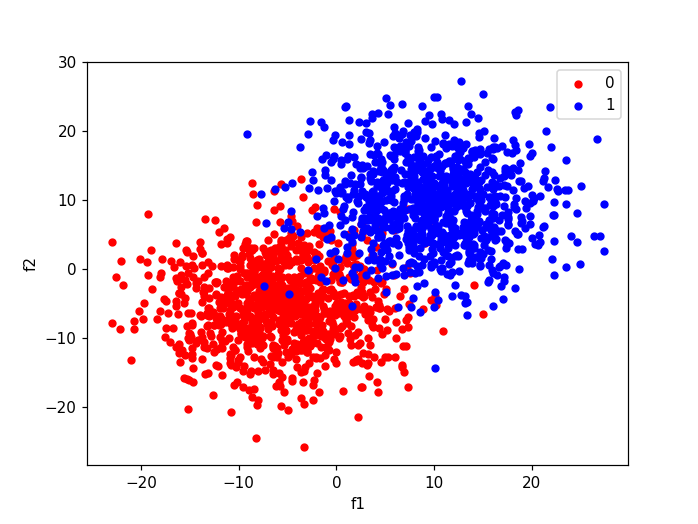

In [66]:
# scatter plot, dots colored by class value
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df_2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.ylabel('f2')
plt.xlabel('f1')
plt.show()

In [67]:
# 2.
# Datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [68]:
# 3. 
# Estimador y predictor
logisticR  = LogisticRegression(C=0.01, solver='liblinear')

# 4. Entrenamiento/Estimación
logisticR.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
xx, yy = np.mgrid[X.min(0)[0]:X.max(0)[0]:.01, X.min(0)[1]:X.max(0)[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = logisticR.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min(0)[1], X.max(0)[1]), ylim=(X.min(0)[0], X.max(0)[0]),
       xlabel="$X_1$", ylabel="$X_2$")